In [ ]:
from IPython.display import display
import ipywidgets as widgets

display(widgets.IntSlider())  # or any widget to re-trigger widget state

## Importing PyTorch and setting device agnostic code

In [1]:
import torch
from torch import nn

torch.__version__

'2.6.0+cu124'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## **Get Data**
Dataset is a subset of Food101 dataset.

This dataset starts with 3 classes of food and only 10% of the images (75 training, 25 testing).

Reason is when starting out ML projects it is important to try things on a small scale then increase the scale when necessary. The whole point is to speed up the experiment.

In [3]:
import requests
from pathlib import Path
import zipfile

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping downlaod")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


## Becoming one with the data (data preparation and data exploration)

In [4]:
import os
def walk_through_dir(dir_path):
  """
  walks through dir_path returning its contents.
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [6]:
image_path

PosixPath('data/pizza_steak_sushi')

In [7]:

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Visualizing an image
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since working with images, open the image using Python's PIL
5. Show the image and print metadata.

Random image path: data/pizza_steak_sushi/test/pizza/3092704.jpg
Image class: pizza
Image height: 512
Image width: 512


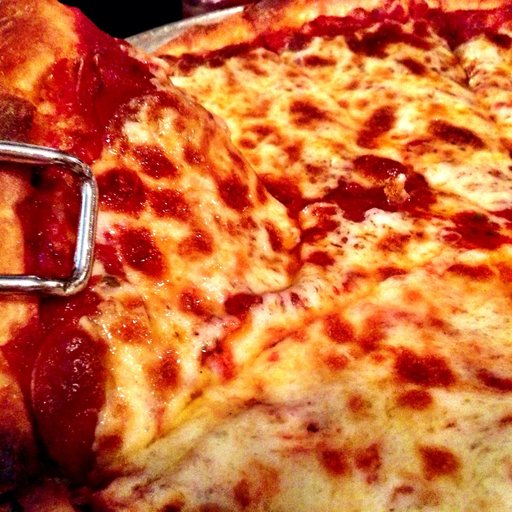

In [8]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg')) # use of glob to search for all .jpg files three levels deep

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
# print(random_image_path)

# 3. Get the image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem # mehtod of pathlib
# print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [9]:
print(random_image_path.parent)
print(random_image_path.parent.stem)

data/pizza_steak_sushi/test/pizza
pizza


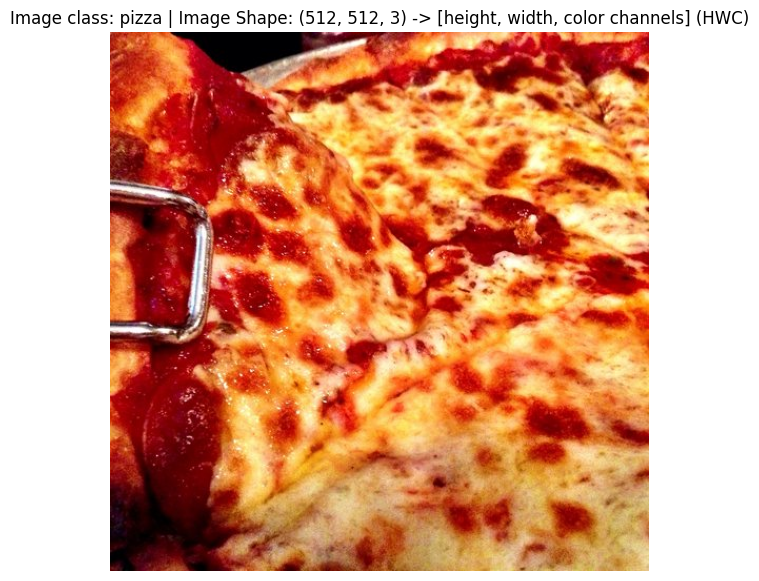

In [10]:
# VIsualizing with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image Shape: {img_as_array.shape} -> [height, width, color channels] (HWC)") # standard format for PIL and matplotlib
plt.axis(False);

array([[[201,  96,  75],
        [181,  75,  53],
        [170,  55,  36],
        ...,
        [217,  45,  35],
        [230,  54,  41],
        [213,  37,  22]],

       [[220, 113,  95],
        [179,  70,  50],
        [169,  54,  35],
        ...,
        [211,  37,  30],
        [214,  37,  27],
        [201,  25,  12]],

       [[192,  82,  67],
        [154,  41,  25],
        [167,  50,  33],
        ...,
        [234,  59,  56],
        [217,  39,  35],
        [195,  18,  12]],

       ...,

       [[ 84,  10,  11],
        [ 93,  21,  22],
        [102,  30,  33],
        ...,
        [231, 199, 140],
        [225, 193, 136],
        [227, 196, 141]],

       [[ 84,   4,   5],
        [ 87,   9,   9],
        [ 92,  16,  18],
        ...,
        [231, 199, 140],
        [227, 195, 138],
        [228, 195, 141]],

       [[ 90,   8,  10],
        [ 81,   1,   2],
        [ 80,   0,   3],
        ...,
        [233, 198, 140],
        [230, 198, 141],
        [231, 198, 144]]], dtype=uint8)
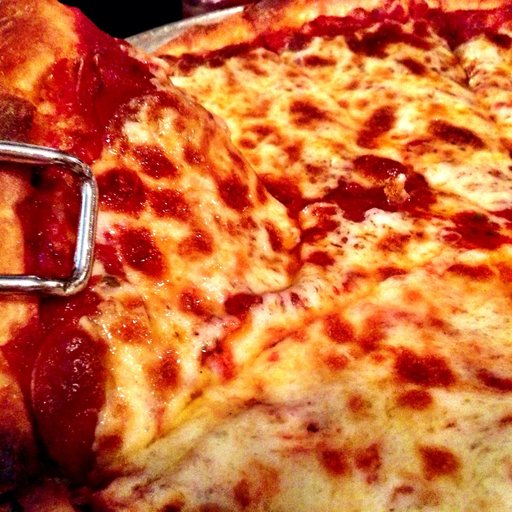

In [11]:
img_as_array

In [12]:
len(image_path_list)

300

## Transforming Data
1. Turn your target data into tensors(in this case, numerical representation of the images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader`.

In [13]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### Transforming data with `torchvision.transforms`

In [14]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize the image
    transforms.Resize(size=(64, 64)),
    # Flip the image randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.tensor
    transforms.ToTensor()
])
# PyTorch tensors are in the shape (C, H, W).

In [15]:
print(data_transform(img).shape)
print(data_transform(img).dtype)
print(data_transform(img))

torch.Size([3, 64, 64])
torch.float32
tensor([[[0.8078, 0.9216, 0.9647,  ..., 0.8196, 0.7765, 0.6941],
         [0.7098, 0.8431, 0.8549,  ..., 0.8510, 0.7843, 0.7255],
         [0.7922, 0.8549, 0.8980,  ..., 0.7529, 0.7373, 0.7137],
         ...,
         [0.8980, 0.8745, 0.8353,  ..., 0.0706, 0.0588, 0.1059],
         [0.9137, 0.8706, 0.8392,  ..., 0.1216, 0.0353, 0.0392],
         [0.8980, 0.8745, 0.8431,  ..., 0.0824, 0.0980, 0.2235]],

        [[0.1412, 0.3647, 0.5804,  ..., 0.3020, 0.2471, 0.1804],
         [0.0431, 0.1333, 0.2196,  ..., 0.3961, 0.2941, 0.1922],
         [0.1176, 0.1216, 0.2353,  ..., 0.2118, 0.2314, 0.2235],
         ...,
         [0.7961, 0.7686, 0.7098,  ..., 0.0039, 0.0039, 0.0078],
         [0.8078, 0.7216, 0.6706,  ..., 0.0078, 0.0039, 0.0039],
         [0.7804, 0.7216, 0.6706,  ..., 0.0078, 0.0196, 0.0314]],

        [[0.1255, 0.2000, 0.2980,  ..., 0.1216, 0.1294, 0.0980],
         [0.0902, 0.1490, 0.1490,  ..., 0.1725, 0.1176, 0.0863],
         [0.0941, 0.

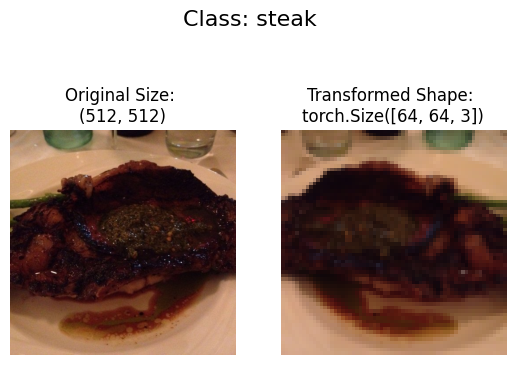

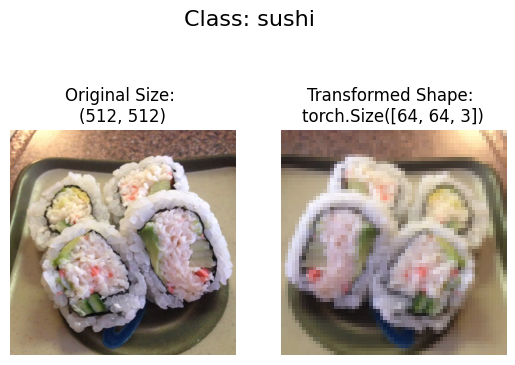

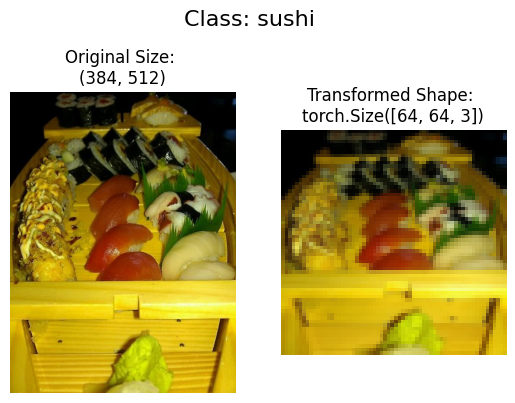

In [16]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms them, then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)  # randomly sample 3 images
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Size: \n{f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # need to change the shape for matplotlib (permute (shuffle) the dimensions of the transformed image to (H, W, C) from (C, W, H))
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed Shape: \n{transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform, seed=None)


In [17]:
image_path_list

[PosixPath('data/pizza_steak_sushi/test/sushi/684266.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1680893.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2540511.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2394442.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3837522.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/175783.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3177743.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_stea

### Option 1: Loading image data using `ImageFolder`
Loading image classification data using `torchvision.datasets.ImageFolder`

In [18]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transfor for the data
                                  target_transform=None) # transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [19]:
# Get class names as lists
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [20]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
# Check the lengths of our data
len(train_data), len(test_data)

(225, 75)

In [22]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [23]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"\nImage shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

In [24]:
class_names[label]

'pizza'

Original shape: torch.Size([3, 64, 64]) -> [Color chanels, Height, Width]
Image permute: torch.Size([64, 64, 3]) -> [Height, Width, Color chanels]


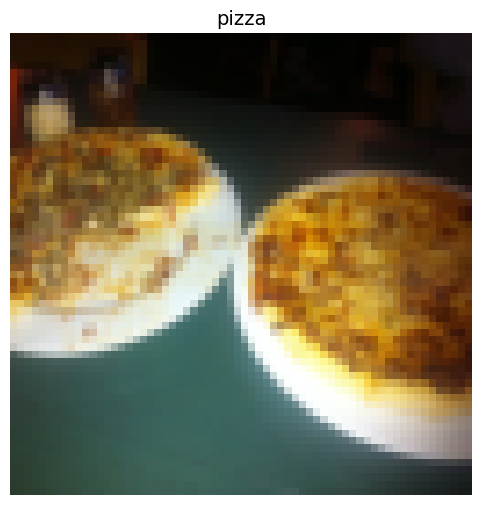

In [25]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [Color chanels, Height, Width]")
print(f"Image permute: {img_permute.shape} -> [Height, Width, Color chanels]")

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=14);

In [26]:
## Go through the TORCHVISION TRANSFORMING AND AUGMENTING IMAGES
# Adjust the transforms

### Turning loaded images into `DataLoader`
Turning the dataset into iterables and customize the `batch_size` so our model can see `batch_size` images at a time

In [27]:
import os
os.cpu_count()

2

In [28]:
# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c4a4cc6cf90>,
 <torch.utils.data.dataloader.DataLoader at 0x7c4a5616ca50>)

In [29]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [30]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_chanels, height, width]")
print(f"Label shpae: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_chanels, height, width]
Label shpae: torch.Size([1])


### Option 2: Loading Image Data with a custom `Dataset`
1. Want to be able to load images from file.
2. Want to be able to get class names from the Dataset.
3. Want to be able to get classes as dictionary from the Dataset.

Pros:
* Can create a `Dataset` out of almost anything.
* Not limited to PyTorch pre-built `Dataset` functions.

Cons:
* Even though you could create `Dataset` out of almost anything, it doesn't mean it will work...
* Using a custom `Dataset` often results in one writing more code, which could be prone to errors or performance issues.

In [31]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List



In [32]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating a helper function to get class names
We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found(if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them.

In [33]:
# setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [34]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'steak'>, <DirEntry 'pizza'>]

In [35]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str, int]]:
  """
  Find the class folder names in a target directory
  """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any class in {directory}... please check file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [36]:
find_classes(directory=test_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Replicating custom `Dataset` to replicate `ImageFolder`
To create a custom dataset, one should:
1. Subclass `torch.utils.data.Dataset`
2. Init the subclass with a target direcotry (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
> * paths - paths of our images
> * transform - the transform we'd like to use
> * classes - a list of the target classes
> * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image.
5. Overwrite the `__len__()` method to return the length of our dataset
6. Overwrite the `__getitem__()` method to return a given sample when passed an index.

In [37]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom data
  def __init__(self, targ_dir:str, transform:None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(directory=targ_dir)

  # 4. Create a function to load images
  def load_image(self, index:int) -> Image.Image:
    """
    Opens an image via a path and returns it.
    """
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    """
    Returns the total number of samples
    """
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    """
    Returns one sample of data, data and label (X,y).
    """
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expect path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]
    # transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [38]:
# create a transform
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([transforms.Resize(size=(64, 64)),
                                      transforms.ToTensor()
                                      ])

In [39]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [40]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                       transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [41]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7c4a4cc860d0>,
 <__main__.ImageFolderCustom at 0x7c4a4cbda8d0>)

In [42]:
len(train_data), len(train_data_custom)

(225, 225)

In [43]:
len(test_data), len(test_data_custom)

(75, 75)

In [44]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [45]:
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### Create a function to display random images
1. Take in `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, capping the number of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample indexes and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib (HWC).

In [46]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                         classes:List[str] = None,
                         n: int = 10,
                         display_shape: bool=True,
                         seed: int=True):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 9 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_sample_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # from [color_chanels, height, width] -> [height, width, color_chanels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title, fontsize=6)


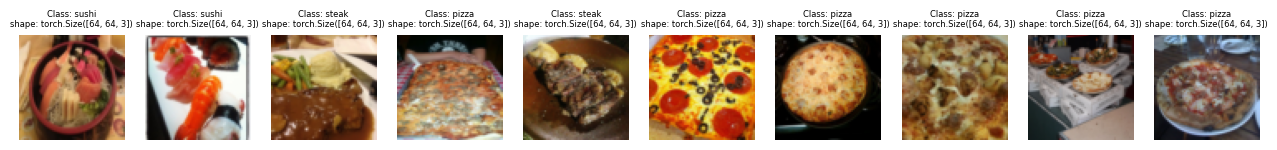

In [47]:
# Display random images from the ImageFolder created Dataset
display_random_images(dataset=train_data,
                      classes=class_names,
                      n=10,
                      seed=None)

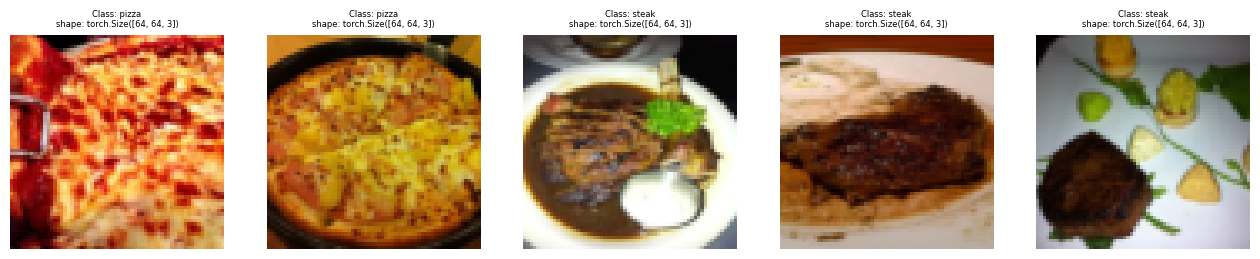

In [48]:
# Display random images from the ImageFolderCustom Dataset
display_random_images(dataset=test_data,
                      n=5,
                      classes=class_names,
                      seed=42)

In [49]:
train_data.classes

['pizza', 'steak', 'sushi']

In [50]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [51]:
# random.seed(42)
random.sample(range(len(train_data_custom)), k=10)

[35, 188, 26, 173, 189, 139, 22, 151, 108, 8]

In [52]:
class_names

['pizza', 'steak', 'sushi']

### Turn custom loaded images into `DataLoader's`

In [53]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7c4a4c2876d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c4a4c21d350>)

In [54]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [55]:
## Data augmentation is manipulating images in some way, shape or form so that we can artificially increase the diversity of our training dataset

## Other forms of transforms (Data Augmentation)
Data augmentation is the process if artificially adding diversity to your training data. In this case of image data, this may mean applying various image transformations to the training images.

In [56]:
# Looking at trivial augment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # ranges from 0-31 the higher the greater the intensity of the applied transform
    transforms.ToTensor()
])
test_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor()
                                     ])

In [57]:
image_path

PosixPath('data/pizza_steak_sushi')

In [58]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/684266.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1680893.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2540511.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2394442.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3837522.jpg')]

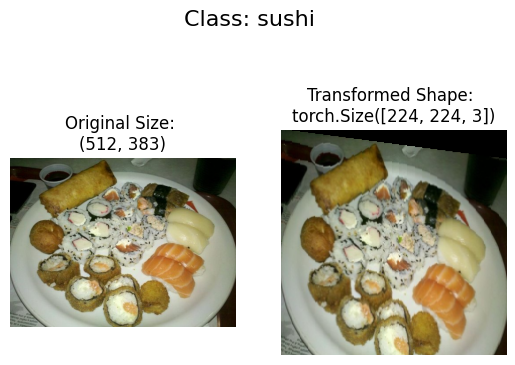

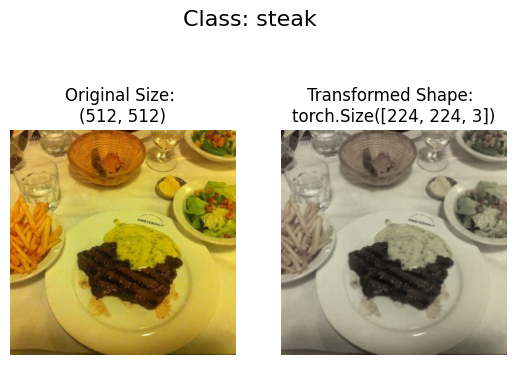

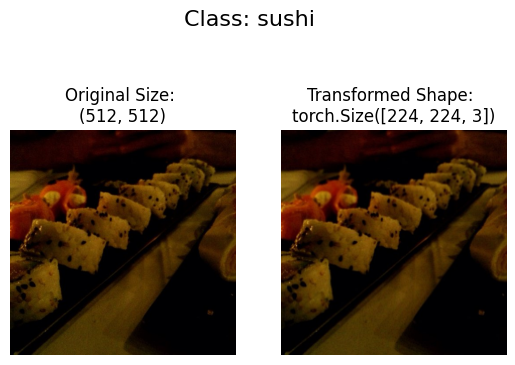

In [59]:
# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3
)

## Model 0: TinyVGG without data augmentation
Replicating TinyVGG architecture from the CNN [explainer website](https://poloclub.github.io/cnn-explainer/).

### Creating transforms and loading data for Model0

In [60]:
# Create simple transform
from torchvision import transforms, datasets

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [61]:
# 1. Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                   transform=simple_transform,
                                   target_transform=None)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                  transform=simple_transform)
# train_data_simple, test_data_simple
# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### Create TinyVGG model class

In [62]:
from torch import nn
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer.
  """
  def __init__(self,
               input_shape: int,
               hidden_units:int,
               output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, # getting the error: RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1690 and 2560x3) therefore, mutiply 13*13 to match the inner matrix (hidden_units is 10)
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion [read fromMaking Deep Learning go Brrr]

[**Making Deep Learning go Brrrr**](https://horace.io/brrr_intro.html)

In [63]:
%%time
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels in this image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

CPU times: user 3.87 ms, sys: 2.89 ms, total: 6.76 ms
Wall time: 11.7 ms


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [64]:
len(class_names)

3

### Trying a forward pass on a single image (to test the model)

In [65]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [66]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### Use `torchinfo` to get an idea of the shapes going through the model

In [67]:
# Install torchinfo, import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## Create train and test loops functions
- `train_step()` - takes in a model and dataloader and trains the model on the dataloader.
- `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader.

In [68]:
# Create train_step()
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X,y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)  # output model logits

    # 2. loss function
    loss = loss_fn(y_pred, y)  # (output, target)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy
  train_loss = train_loss/len(dataloader) # num of the batches
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc


In [69]:
# Create a test step function
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):
  # Put the model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send the data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)
    return test_loss, test_acc

In [70]:
list(model_0.parameters())[0]

Parameter containing:
tensor([[[[ 0.1471,  0.1597, -0.0451],
          [ 0.1768, -0.0422,  0.0388],
          [-0.0937,  0.1130,  0.1697]],

         [[-0.1412,  0.1673,  0.0360],
          [ 0.1422,  0.0261,  0.0928],
          [-0.0272,  0.1484,  0.0284]],

         [[-0.0898,  0.0491, -0.0887],
          [-0.0226, -0.0782,  0.1277],
          [-0.1519, -0.0887, -0.0543]]],


        [[[-0.1157,  0.0182, -0.1901],
          [ 0.1738, -0.1635,  0.1486],
          [ 0.0320, -0.0625,  0.1189]],

         [[ 0.0300,  0.1555,  0.0210],
          [-0.0607,  0.0517, -0.0522],
          [ 0.0810,  0.1718,  0.1112]],

         [[-0.0841,  0.1111,  0.0344],
          [ 0.0977, -0.1173, -0.1905],
          [-0.0744, -0.1476,  0.1579]]],


        [[[ 0.0554,  0.0797,  0.0609],
          [-0.0033,  0.1506, -0.1367],
          [ 0.0121, -0.1314,  0.0593]],

         [[-0.0663,  0.0590, -0.0401],
          [ 0.1596, -0.1141, -0.1148],
          [-0.1148,  0.1731,  0.0641]],

         [[ 0.1852, -0

### Creating a `train()` function to combine `train_step()` and `test_step()`

In [71]:
from tqdm.auto import tqdm
# 1. Create a train function that takes in various parameters
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
  # 2.Create empty results dictionary
  results = {"train_loss" : [],
             "train_acc" : [],
             "test_loss" : [],
             "test_acc" : []}
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs), desc="Chill lil' nigga, gahdamn..."):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    # 4. Print out what's happenin'
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### Train and evaluate model 0

In [72]:
# Set random seeds
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

Chill lil' nigga, gahdamn...:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1063 | Train acc: 0.3047% | Test loss: 1.0983 | Test acc: 0.3011%
Epoch: 1 | Train loss: 1.0998 | Train acc: 0.3281% | Test loss: 1.0697 | Test acc: 0.5417%
Epoch: 2 | Train loss: 1.0869 | Train acc: 0.4883% | Test loss: 1.0808 | Test acc: 0.4924%
Epoch: 3 | Train loss: 1.0842 | Train acc: 0.3984% | Test loss: 1.0608 | Test acc: 0.5833%
Epoch: 4 | Train loss: 1.0662 | Train acc: 0.4141% | Test loss: 1.0654 | Test acc: 0.5644%
Total training time: 16.366 seconds


In [73]:
model_0_results

{'train_loss': [1.106319084763527,
  1.0998057276010513,
  1.0868544578552246,
  1.0842333287000656,
  1.0662163645029068],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.3984375, 0.4140625],
 'test_loss': [1.0983205238978069,
  1.069690187772115,
  1.0807572205861409,
  1.0608318249384563,
  1.0653960307439168],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

### Plotting loss curves for Model 0
A loss curve is a way of tracking your model's progress over time.

In [74]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [75]:
def plot_loss_curves(results:Dict[str, List[float]]):
  """
  Plots training curves of a results dictionary.
  """
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary(training and testing)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 5))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

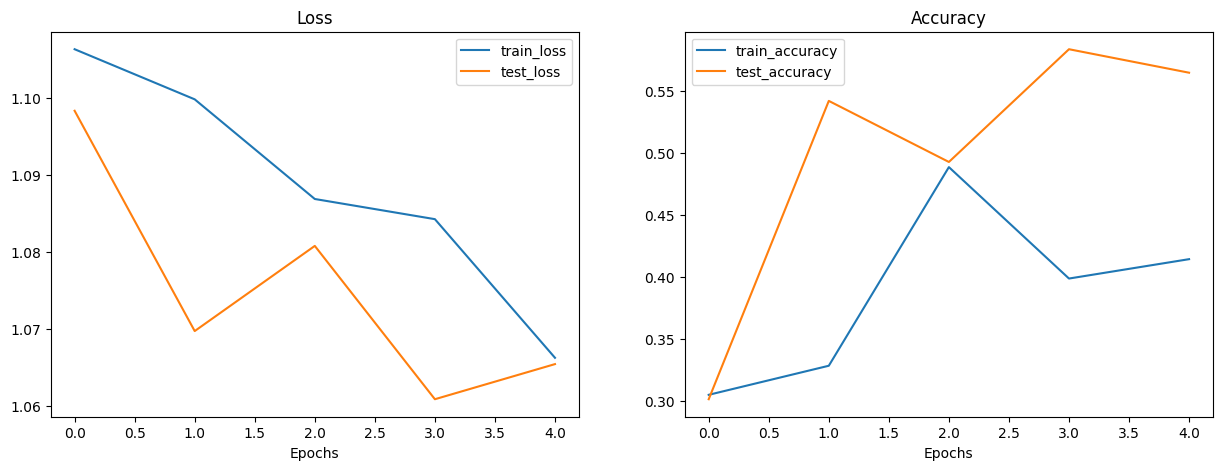

In [76]:
plot_loss_curves(model_0_results)

## What should an ideal loss curve look like?
[A loss curve is one of the most helpful ways to troubleshoot a model](https://developers.google.com/machine-learning/crash-course/overfitting/interpreting-loss-curves).

## Model 1: TinyVGG with Data Augmentation
Trying another modelling experiment using the same model as before with some data augmentation.

### Create transform with data augmentation

In [77]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### Create train and test `Datasets` and `DataLoaders`

In [78]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmnented = datasets.ImageFolder(root=train_dir,
                                             transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [79]:
# Turn Datasets into dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmnented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7c4a47f27b10>,
 <torch.utils.data.dataloader.DataLoader at 0x7c4a47f753d0>)

### Construct and train model 1
This time using the same model architecture except this time we've augmented the training data.

In [80]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmnented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [81]:
# Set random seeds
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Setup the loss function (also called criterion)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Set the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time for model_1: {end_time-start_time:.3f} seconds")

Chill lil' nigga, gahdamn...:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1049 | Train acc: 0.2500% | Test loss: 1.1019 | Test acc: 0.2604%
Epoch: 1 | Train loss: 1.0807 | Train acc: 0.4258% | Test loss: 1.1261 | Test acc: 0.2604%
Epoch: 2 | Train loss: 1.0712 | Train acc: 0.4258% | Test loss: 1.1593 | Test acc: 0.2604%
Epoch: 3 | Train loss: 1.1253 | Train acc: 0.3047% | Test loss: 1.1581 | Test acc: 0.2604%
Epoch: 4 | Train loss: 1.0865 | Train acc: 0.4258% | Test loss: 1.1554 | Test acc: 0.3333%
Total training time for model_1: 19.522 seconds


In [82]:
model_1_results

{'train_loss': [1.104914203286171,
  1.0806865319609642,
  1.0711720064282417,
  1.125308334827423,
  1.0865339040756226],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.1019279559453328,
  1.1260557969411213,
  1.159274657567342,
  1.1580672065416973,
  1.1554409265518188],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.3333333333333333]}

### Plot a loss curve for model 1
Helps to evaluate the models performance overtime.

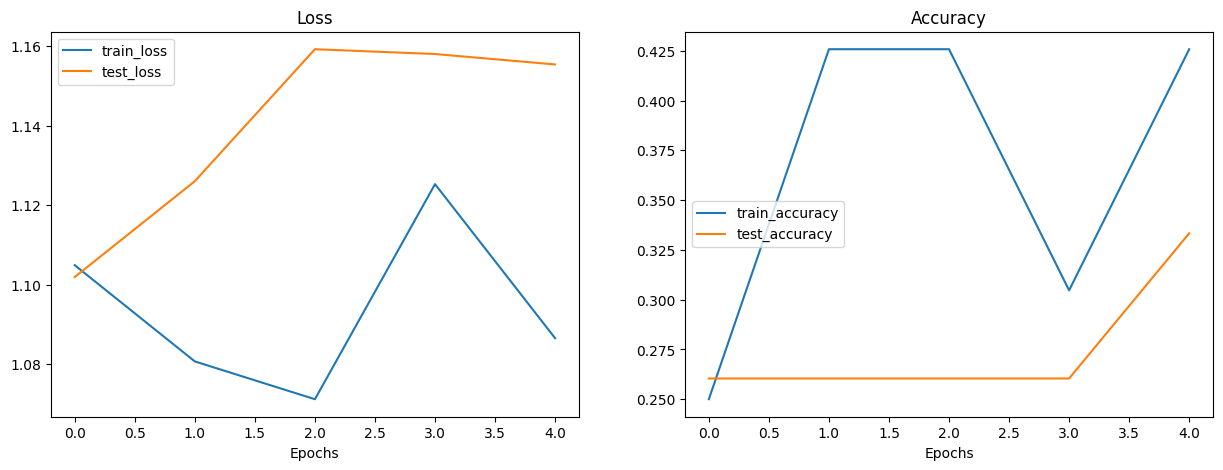

In [83]:
plot_loss_curves(model_1_results)

## Compare model results
After evaluating modelling experiments on their own it is important to compare them to each other.

Some ways to do this:
1. Hard coding ***(implemented)***
2. PyTorch + Tensorboard
3. Weights & Biases
4. MLflow

In [84]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.106319   0.304688   1.098321  0.301136
1    1.099806   0.328125   1.069690  0.541667
2    1.086854   0.488281   1.080757  0.492424
3    1.084233   0.398438   1.060832  0.583333
4    1.066216   0.414062   1.065396  0.564394

In [85]:
model_1_df

train_loss  train_acc  test_loss  test_acc
0    1.104914   0.250000   1.101928  0.260417
1    1.080687   0.425781   1.126056  0.260417
2    1.071172   0.425781   1.159275  0.260417
3    1.125308   0.304688   1.158067  0.260417
4    1.086534   0.425781   1.155441  0.333333

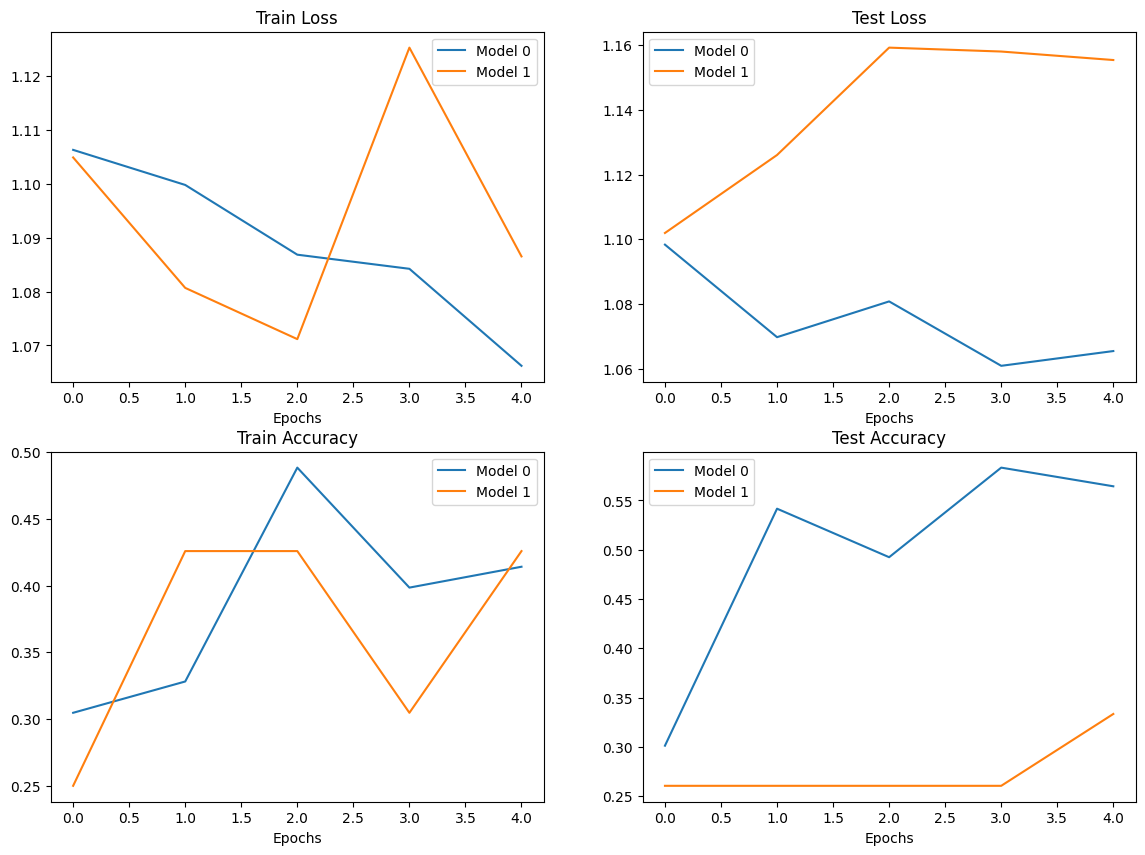

In [86]:
# Setup a plot
plt.figure(figsize=(14, 10))

# Get the number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## Making predictions on a custom image


In [87]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "Sushi-pic-chef.jpg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://images.pexels.com/photos/1422384/pexels-photo-1422384.jpeg?cs=srgb&dl=pexels-huy-phan-316220-1422384.jpg&fm=jpg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download...")

In [88]:
data_path

PosixPath('data')

### Loading in a custom image with PyTorch
Make sure the custom image is in the same format as the data the model was trained on:
* In tensor form with dtype torch.float32
* Of shape 64x64x3
* On the device

[Read](https://pytorch.org/vision/stable/io.html)

In [89]:
import torchvision
# Read in custom image
custom_image_uint8 = torchvision.io.read_image(custom_image_path)
print(f"Custom image tensor:\n {custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[ 97,  92,  91,  ..., 166, 171, 174],
         [ 99,  98,  97,  ..., 165, 171, 174],
         [ 87,  96,  97,  ..., 169, 174, 177],
         ...,
         [163, 171, 175,  ...,  92, 100, 107],
         [164, 175, 182,  ...,  92,  98, 102],
         [174, 170, 171,  ..., 100, 103, 101]],

        [[145, 140, 139,  ..., 191, 196, 199],
         [147, 146, 145,  ..., 190, 196, 199],
         [135, 144, 145,  ..., 194, 199, 202],
         ...,
         [135, 143, 147,  ...,  65,  73,  80],
         [136, 147, 154,  ...,  65,  71,  75],
         [146, 142, 143,  ...,  73,  76,  74]],

        [[157, 152, 151,  ..., 231, 236, 239],
         [159, 158, 157,  ..., 230, 236, 239],
         [147, 156, 157,  ..., 234, 239, 242],
         ...,
         [113, 121, 125,  ...,  36,  44,  51],
         [114, 125, 132,  ...,  36,  42,  46],
         [124, 120, 121,  ...,  44,  47,  45]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 3510, 5972])

Custom image da

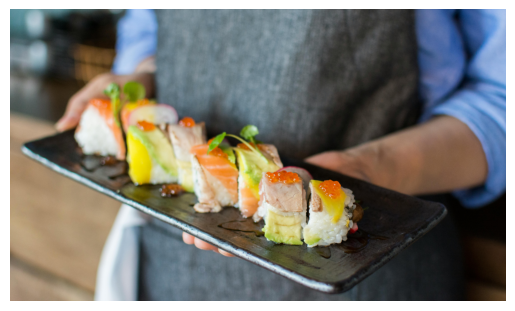

In [90]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))
plt.axis("off");

### Making a prediction on a custom image with a trained PyTorch model

In [91]:
# # Load in the same custom image and convert to torch.float32
# custom_image_tensor = (custom_image_uint8).type(torch.float32)
# custom_image_tensor.dtype

In [92]:
# custom_image_tensor

Our custom_image tensor is of datatype `torch.uint8` and its values are between [0, 255].

But our model takes image tensors of datatype `torch.float32` and with values between [0, 1].

So before we use our custom image with our model, we'll need to convert it to the same format as the data our model is trained on.

In [93]:
# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
custom_image

tensor([[[0.3804, 0.3608, 0.3569,  ..., 0.6510, 0.6706, 0.6824],
         [0.3882, 0.3843, 0.3804,  ..., 0.6471, 0.6706, 0.6824],
         [0.3412, 0.3765, 0.3804,  ..., 0.6627, 0.6824, 0.6941],
         ...,
         [0.6392, 0.6706, 0.6863,  ..., 0.3608, 0.3922, 0.4196],
         [0.6431, 0.6863, 0.7137,  ..., 0.3608, 0.3843, 0.4000],
         [0.6824, 0.6667, 0.6706,  ..., 0.3922, 0.4039, 0.3961]],

        [[0.5686, 0.5490, 0.5451,  ..., 0.7490, 0.7686, 0.7804],
         [0.5765, 0.5725, 0.5686,  ..., 0.7451, 0.7686, 0.7804],
         [0.5294, 0.5647, 0.5686,  ..., 0.7608, 0.7804, 0.7922],
         ...,
         [0.5294, 0.5608, 0.5765,  ..., 0.2549, 0.2863, 0.3137],
         [0.5333, 0.5765, 0.6039,  ..., 0.2549, 0.2784, 0.2941],
         [0.5725, 0.5569, 0.5608,  ..., 0.2863, 0.2980, 0.2902]],

        [[0.6157, 0.5961, 0.5922,  ..., 0.9059, 0.9255, 0.9373],
         [0.6235, 0.6196, 0.6157,  ..., 0.9020, 0.9255, 0.9373],
         [0.5765, 0.6118, 0.6157,  ..., 0.9176, 0.9373, 0.

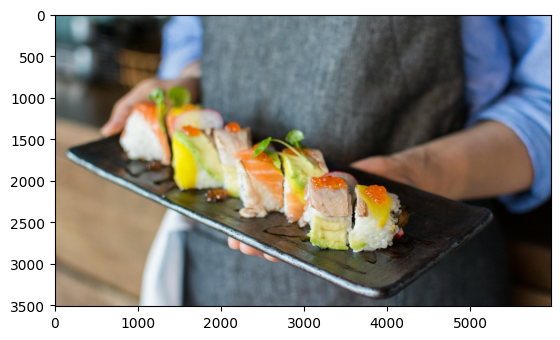

In [94]:
plt.imshow(custom_image.permute(1,2,0))

In [95]:
custom_image.shape

torch.Size([3, 3510, 5972])

In [96]:
# create transform pipeline to resize image
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed image: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 3510, 5972])
Transformed image: torch.Size([3, 64, 64])


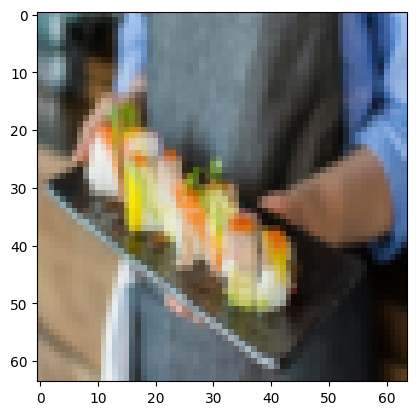

In [97]:
plt.imshow(custom_image_transformed.permute(1,2,0));

In [98]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device)) # Adding unsqueeze(0) method to match the batch size of 1
custom_image_pred

tensor([[ 0.0722,  0.0390, -0.1928]])

In [99]:
model_0.eval()
with torch.inference_mode():
  custom_image_pred = model_0(custom_image_transformed.unsqueeze(0).to(device)) # Adding unsqueeze(0) method to match the batch size of 1
custom_image_pred

tensor([[-0.1570, -0.0123, -0.0170]])

#### ***NOTES: STEPS...***
* Load the image and turn it into tensor
* Make sure the image was the same dtype as the model(torch.float32).
* Make sure the image was the same shape as the the model was trained on (3,64,64) with a batch sizze... (1,3,64,64)
* Make sure the image was on the same device as the model.

In [100]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3025, 0.3496, 0.3479]])

In [101]:
# COnvert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1).cpu()
custom_image_pred_label

tensor([1])

In [102]:
class_names[custom_image_pred_label]

'steak'

## Putting image prediction together: building a function
Ideal outcome: A function where we pass an image and have the model predict on that image and plot the image+prediction

In [103]:
def pred_and_plot_image(model:nn.Module,
                        image_path:str,
                        class_names:List[str]=None,
                        transform=None,
                        device=device):
  """
  Makes a prediction on a target image with a trained model and plots the image and prediction.
  """
  # Load the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image/255.

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the target device
  model.to(device)

  # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on batches of 1x image)
  target_image = target_image.unsqueeze(0)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Make a prediction in the image with an extra dimension
    target_image_pred = model(target_image.to(device)) # making sure the image is on the right device

  # Convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert prediction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # Print the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to HWC
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False);

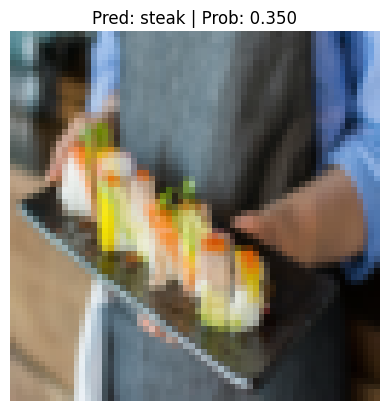

In [104]:
# Pred on custom image
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [105]:
custom_image_path

PosixPath('data/Sushi-pic-chef.jpg')

In [106]:
class_names

['pizza', 'steak', 'sushi']

In [107]:
#*****************************************************************************************************************************************************

## **Going Modular PyTorch**

In [108]:
# Create a directory going_modular
from pathlib import Path
import os
dir_name = Path("going_modular")
if dir_name.is_dir():
  print(f"{dir_name} already exists.")
else:
  print(f"Making {dir_name}")
  os.makedirs(dir_name)

Making going_modular


In [109]:
from torchvision import transforms, datasets
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
print(f"Train data:\n{train_data} \nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           ) 
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [110]:
%%writefile going_modular/data_setup.py
"""
Contains functionality for creating PyTorch DataLoader's for image classification data.
"""

import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(train_dir:str,
                       test_dir:str,
                       transform:transforms.Compose,
                       batch_size:int,
                       num_workers:int=NUM_WORKERS):
  """
  Creates training and testing DataLoaders.
  Takes in a training directory and testing directory path and turns them into PyTorch Datasets and then into PyTorch DataLoaders

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names = create_dataloaders(train_dir=path/to/train_dir,
      test_dir=path/to/test_dir,
      transform=some_transform,
      batch_size=32,
      num_workers=2)
  """

  # Check if directories exist
  if not os.path.isdir(train_dir):
      raise FileNotFoundError(f"Training directory not found: {train_dir}")
  if not os.path.isdir(test_dir):
      raise FileNotFoundError(f"Testing directory not found: {test_dir}")

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(root=train_dir, transform=transform)
  test_data = datasets.ImageFolder(root=test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into DataLoaders
  train_dataloader = DataLoader(dataset=train_data,
                                batch_size=batch_size,
                                shuffle=True,
                                num_workers=num_workers,
                                pin_memory=True # Pin memory reduces the transfer memory time between GPU and CPU so it pins it to memory to the GPU
                                )

  test_dataloader = DataLoader(dataset=test_data,
                               batch_size=batch_size,
                               shuffle=False,
                               num_workers=num_workers,
                               pin_memory=True)

  return train_dataloader, test_dataloader, class_names

Writing going_modular/data_setup.py


In [111]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [112]:
from going_modular.data_setup import create_dataloaders

train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transform,
    batch_size=32
    )
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7c4a5ca05750>,
 ['pizza', 'steak', 'sushi'])

### Making a model (TinyVGG) with a script (`model_builder.py`)
Turning the model building code into a python script.

In [113]:
%%writefile going_modular/model_builder.py
"""
Contains PyTorch model code to instantiate a TinyVGG model from the CNN Explainer website.
"""
from torch import nn
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer.

  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self,
               input_shape: int,
               hidden_units:int,
               output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, # getting the error: RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1690 and 2560x3) therefore, mutiply 13*13 to match the inner matrix (hidden_units is 10)
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion [read fromMaking Deep Learning go Brrr]

Writing going_modular/model_builder.py


In [114]:
from going_modular import model_builder

In [115]:
import torch

from going_modular import model_builder

device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate a model from the model_builder.py
torch.manual_seed(42)
model_2 = model_builder.TinyVGG(input_shape=3,
                               hidden_units=10,
                               output_shape=len(class_names)).to(device)
model_2

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [116]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
  pred = model_0(img_single.to(device))

print(f"Output logits: \n{pred}\n")
print(f"Output prediction probabilities:\n {torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Output logits: 
tensor([[-0.0339, -0.1281, -0.0103]])

Output prediction probabilities:
 tensor([[0.3408, 0.3102, 0.3490]])

Output prediction label:
tensor([2])

Actual label:
0


In [117]:
# Create a train_step
from typing import Tuple

# Create train_step()
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device=device) -> Tuple[float, float]:
  """
  Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then runs through all of the required training steps (forward pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch loss function to minimize.
    device: A target device to compute on, i.e. 'gpu' or 'cpu'

  Returns:
    A Tuple of training loss and training accuracy matrice.
    In the form (train_loss, train_accuracy). For example; (0.1112, 0.8743)
  """
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X,y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)  # output model logits

    # 2. loss function
    loss = loss_fn(y_pred, y)  # (output, target)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy
  train_loss = train_loss/len(dataloader) # num of the batches
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc

In [118]:
# Create a test step function
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device) -> Tuple[float, float]:
  """
  Test Step............
  """
  # Put the model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send the data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)
    return test_loss, test_acc

In [119]:
from typing import Dict, List, Tuple
from tqdm.auto import tqdm

# 1. Create a train function that takes in various parameters
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int,
          device: torch.device) -> Dict[str, List[float]]:
  """
  Trains and tests a PyTorch model.
  """

  # 2.Create empty results dictionary
  results = {"train_loss" : [],
             "train_acc" : [],
             "test_loss" : [],
             "test_acc" : []}
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs), desc="Working on it..."):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    # 4. Print out what's happenin'
    print(f"Epoch: {epoch+1} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### Turning training functions to a script (`engine.py`)

In [120]:
%%writefile going_modular/engine.py
"""
Combined training and testing utilities for PyTorch models.
"""
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

device = "cuda" if torch.cuda.is_available() else "cpu"

def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device=device) -> Tuple[float, float]:
  """
  Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then runs through all of the required training steps (forward pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch loss function to minimize.
    device: A target device to compute on, i.e. 'gpu' or 'cpu'

  Returns:
    A Tuple of training loss and training accuracy matrice.
    In the form (train_loss, train_accuracy). For example; (0.1112, 0.8743)
  """
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X,y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)  # output model logits

    # 2. loss function
    loss = loss_fn(y_pred, y)  # (output, target)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy
  train_loss = train_loss/len(dataloader) # num of the batches
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc

def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device) -> Tuple[float, float]:
  """
  Test Step............
  """
  # Put the model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send the data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)
    return test_loss, test_acc

# 1. Create a train function that takes in various parameters
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int,
          device: torch.device) -> Dict[str, List[float]]:
  """
    Runs full training loop over given number of epochs, including evaluation.

    Args:
        model: PyTorch model.
        train_dataloader: DataLoader for training.
        test_dataloader: DataLoader for validation/test.
        optimizer: Optimizer.
        loss_fn: Loss function.
        epochs: Number of epochs.
        device: Device to run on.

    Returns:
        Dictionary with history of losses and accuracies.
    """

  # 2.Create empty results dictionary
  results = {"train_loss" : [],
             "train_acc" : [],
             "test_loss" : [],
             "test_acc" : []}
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs), desc="Working on it..."):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    # 4. Print out what's happenin'
    print(f"Epoch: {epoch+1} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

Writing going_modular/engine.py


In [121]:
from going_modular.engine import *


### Create a file called `utils.py` with utility functions
'utils' in python is generally reserved for various utility functions.
The only utility function here right now is `save_model()`. They usually gets more as the code grows.

In [122]:
%%writefile going_modular/utils.py
"""
Files containing various utility functions for PyTorch model training.
"""
import torch
from torch import nn
from pathlib import Path

def save_model(model:torch.nn.Module,
               target_dir:str,
               model_name:str):
  """
  Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
    target_dir="models",
    model_name="05_going_modular_tinyvgg_model.pth")
  """
  # Create a target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True, exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pth' or '.pt'"
  model_save_path = target_dir_path/model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(), f=model_save_path)

Writing going_modular/utils.py


### Train, evaluate and save the model (script mode) -> `train.py`


In [123]:
%%writefile going_modular/train.py
"""
Trains a PyTorch image classification model using device-agnostic code.
"""
import os
import torch
from timeit import default_timer as timer
from torchvision import transforms
import data_setup, engine, model_builder, utils


torch.manual_seed(42)
# torch.cuda.manual_seed(42)
# import argparse
# setup hyperparameters
NUM_EPOCHS = 5
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

# Setup the directories
train_dir = "data/pizza_steak_sushi/train"
test_dir = "data/pizza_steak_sushi/test"

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.ToTensor()
                                     ])

# Create DataLoaders and get class_names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=data_transform,
                                                                               batch_size=BATCH_SIZE)

# Create model
model = model_builder.TinyVGG(input_shape=3,
                              hidden_units=HIDDEN_UNITS,
                              output_shape=len(class_names)).to(device)

# Setup loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=LEARNING_RATE)

# Start the timer
from timeit import default_timer as timer
start_timer = timer()

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# End timer and print
end_timer = timer()
print(f"Training time: {end_timer-start_timer:3f} seconds")

# Save the model to file
utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_going_modular_script_mode_tinyvgg_model.pth")

Writing going_modular/train.py


In [124]:
!python going_modular/train.py

Working on it...:   0% 0/5 [00:00<?, ?it/s]Epoch: 1 | Train loss: 1.1063 | Train acc: 0.3047% | Test loss: 1.0983 | Test acc: 0.3011%
Working on it...:  20% 1/5 [00:01<00:06,  1.69s/it]Epoch: 2 | Train loss: 1.0998 | Train acc: 0.3281% | Test loss: 1.0697 | Test acc: 0.5417%
Working on it...:  40% 2/5 [00:03<00:05,  1.70s/it]Epoch: 3 | Train loss: 1.0869 | Train acc: 0.4883% | Test loss: 1.0808 | Test acc: 0.4924%
Working on it...:  60% 3/5 [00:05<00:03,  1.73s/it]Epoch: 4 | Train loss: 1.0842 | Train acc: 0.3984% | Test loss: 1.0608 | Test acc: 0.5833%
Working on it...:  80% 4/5 [00:06<00:01,  1.71s/it]Epoch: 5 | Train loss: 1.0662 | Train acc: 0.4141% | Test loss: 1.0654 | Test acc: 0.5644%
Working on it...: 100% 5/5 [00:09<00:00,  1.90s/it]
Training time: 9.508125 seconds
[INFO] Saving model to: models/05_going_modular_script_mode_tinyvgg_model.pth


In [125]:
#*********************REAL PYTHON ARGPARSE****************************************

In [126]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

"""
Combined training and testing utilities for PyTorch models.
"""

def train_step(
    model: nn.Module,
    dataloader: DataLoader,
    loss_fn: nn.Module,
    optimizer: optim.Optimizer,
    device: torch.device,
) -> Tuple[float, float]:
    """
    Performs a single epoch training step.

    Args:
        model: PyTorch model to be trained.
        dataloader: DataLoader for training data.
        loss_fn: Loss function.
        optimizer: Optimizer.
        device: Device to run computations on.

    Returns:
        Tuple of (average loss, average accuracy).
    """
    model.train()
    train_loss, train_acc = 0.0, 0.0

    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(X)
        loss = loss_fn(logits, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        train_acc += (preds == y).float().mean().item()

    avg_loss = train_loss / len(dataloader)
    avg_acc = train_acc / len(dataloader)
    return avg_loss, avg_acc


def test_step(
    model: nn.Module,
    dataloader: DataLoader,
    loss_fn: nn.Module,
    device: torch.device,
) -> Tuple[float, float]:
    """
    Performs a single evaluation step over the test set.

    Args:
        model: PyTorch model to evaluate.
        dataloader: DataLoader for test data.
        loss_fn: Loss function.
        device: Device to run computations on.

    Returns:
        Tuple of (average test loss, average test accuracy).
    """
    model.eval()
    test_loss, test_acc = 0.0, 0.0

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            logits = model(X)
            loss = loss_fn(logits, y)
            test_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            test_acc += (preds == y).float().mean().item()

    avg_loss = test_loss / len(dataloader)
    avg_acc = test_acc / len(dataloader)
    return avg_loss, avg_acc


def train(
    model: nn.Module,
    train_dataloader: DataLoader,
    test_dataloader: DataLoader,
    optimizer: optim.Optimizer,
    loss_fn: nn.Module,
    epochs: int,
    device: torch.device,
) -> Dict[str, List[float]]:
    """
    Runs full training loop over given number of epochs, including evaluation.

    Args:
        model: PyTorch model.
        train_dataloader: DataLoader for training.
        test_dataloader: DataLoader for validation/test.
        optimizer: Optimizer.
        loss_fn: Loss function.
        epochs: Number of epochs.
        device: Device to run on.

    Returns:
        Dictionary with history of losses and accuracies.
    """
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": [],
    }

    for epoch in tqdm(range(1, epochs + 1), desc="Epochs"):  # 1-indexed in logs
        train_loss, train_acc = train_step(
            model, train_dataloader, loss_fn, optimizer, device
        )
        test_loss, test_acc = test_step(
            model, test_dataloader, loss_fn, device
        )

        print(
            f"Epoch {epoch}/{epochs} - "
            f"Train loss: {train_loss:.4f}, acc: {train_acc:.4f} | "
            f"Test loss: {test_loss:.4f}, acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results
